In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

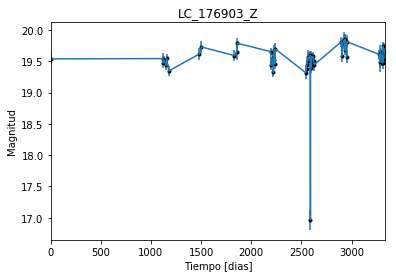

In [2]:
data = np.genfromtxt('LC_176903_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_176903_Z')
plt.savefig("LC_176903_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

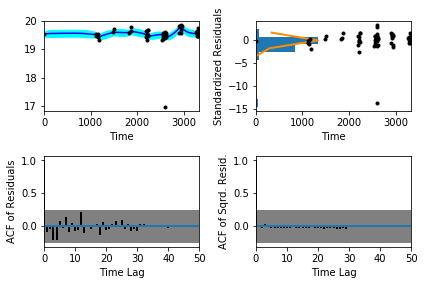

In [5]:
sample.assess_fit()

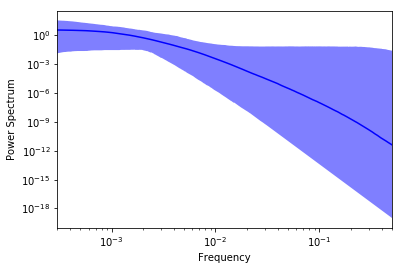

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

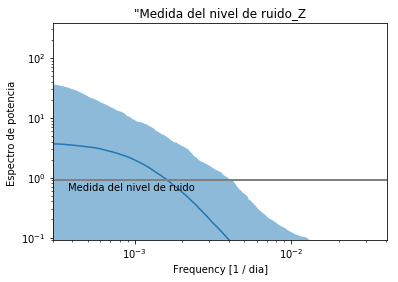

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_176903_Z')
plt.title('"Medida del nivel de ruido_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_176903_Z')

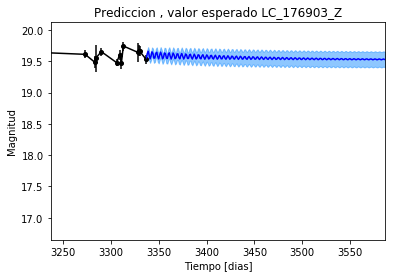

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_176903_Z')

Text(0.5,1,'Prediccion, Caminos simulados  LC_176903_Z')

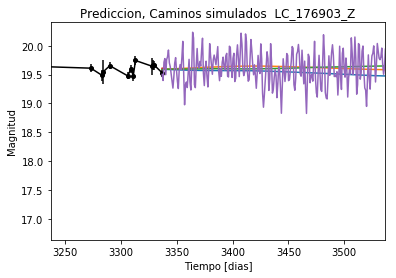

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_176903_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


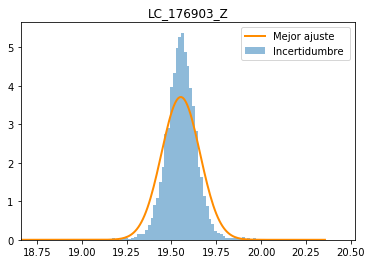

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_176903_Z')
plt.savefig("Mejor_ajuste_LC_176903_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_176903_Z')

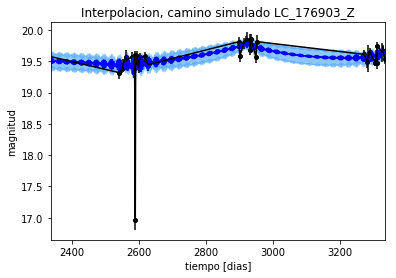

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_176903_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_176903_Z')

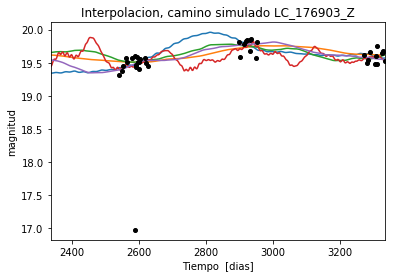

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_176903_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 362.433225354
Median: 0.0058555360832
Standard deviation: 0.194938154532
68% credibility interval: [ 0.00062854  0.17659644]
95% credibility interval: [  3.35098072e-04   7.69863802e-01]
99% credibility interval: [  3.06014804e-04   9.69488887e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 185.348342082
Median: 0.00175669286695
Standard deviation: 0.111780982563
68% credibility interval: [ 0.00050004  0.02400506]
95% credibility interval: [  3.23743253e-04   3.53772566e-01]
99% credibility interval: [  3.04070878e-04   8.49599738e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 231.707265694
Median: 0.0345750263733


In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 840.254735917
Median: 12.1248537634
Standard deviation: 1.70323124989
68% credibility interval: [ 10.24464612  13.44874123]
95% credibility interval: [  7.78585005  14.3914846 ]
99% credibility interval: [  5.79112313  14.78936737]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 271.687847663
Median: 0.749859181358
Standard deviation: 2.48317348178
68% credibility interval: [ 0.05403038  4.18230659]
95% credibility interval: [ 0.01425014  8.69995284]
99% credibility interval: [  1.00169309e-02   1.26734174e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 443.283177431
Median: 0.253411523157
Standard deviation: 13.0656148949
68% credibility interval: [ 0.00948246  8.63399209]
95% credibility interval: [  4.9

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 152.699832149
Median: 1.26846111361e-14
Standard deviation: 1.73059969675e+25
68% credibility interval: [  5.03058073e-75   7.02296079e-01]
95% credibility interval: [  1.45113088e-97   1.71348682e+24]
99% credibility interval: [  4.36499960e-107   1.35098919e+026]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2051.88652508
Median: 19.5780427017
Standard deviation: 0.0582549204634
68% credibility interval: [ 19.52909155  19.62735023]
95% credibility interval: [ 19.46251163  19.69363497]
99% credibility interval: [ 19.391334    19.76250716]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 191.997845965
Median: 0.0040236460806
Standard deviation: 0.249038692586
68% credibility interval: [ 0.          0.35879626]
95% credibility interval: [ 0.          0.88999014]
99% credibility interval: [ 0.          0.97609124]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 191.997845965
Median: 0.0040236460806
Standard deviation: 0.249038692586
68% credibility interval: [ 0.          0.35879626]
95% credibility interval: [ 0.          0.88999014]
99% credibility interval: [ 0.          0.97609124]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 383.925277302
Median: 0.0
Standard deviation: 0.0662993410663
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 840.254735917
Median: 12.1248537634
Standard deviation: 1.70323124989
68% credibility interval: [ 10.24464612  13.44874123]
95% credibility interval: [  7.78585005  14.3914846 ]
99% credibility interval: [  5.79112313  14.78936737]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 442.045183549
Median: 0.01389324536
Standard deviation: 0.0235407862816
68% credibility interval: [ 0.00723251  0.0321762 ]
95% credibility interval: [ 0.00400041  0.08793921]
99% credibility interval: [ 0.0026427   0.12878293]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 338.727658827
Median: 1.96211749034
Standard deviation: 0.153324206623
68% credibility interval: [ 1.89552155  1.99027328]
95% credibility interval: [ 1.35162933  1.9985503 ]
99% credibility interval: [ 0.98825445  1.99975656]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 374.512749143
Median: 4.49039197902e-05
Standard deviation: 13.6131690866
68% credibility interval: [  1.52972329e-07   6.08781322e-03]
95% credibility interval: [  1.63204863e-28   1.50710144e+01]
99% credibility interval: [  4.70534293e-30   7.82278528e+01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 362.433225354
Median: (-0.0367914182836-0.0296392721113j)
Standard deviation: 1.98712780327
68% credibility interval: [-1.10958817+0.j         -0.00394925-0.00875032j]
95% credibility interval: [ -4.83719693e+00+0.j          -2.10548328e-03-0.01236173j]
99% credibility interval: [ -6.09147833e+00+0.j          -1.92274772e-03-0.00399925j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 185.348342082
Median: (-0.0110376268109+0.420048372376j)
Standard deviation: 1.71515144861
68% credibility interval: [-0.15082824+1.18196831j -0.00314186+0.01940426j]
95% credibility interval: [ -2.22281859e+00+2.48677116j  -2.03413885e-03+0.j        ]
99% credibility interval: [ -5.33819259e+00+3.5638468j   -1.91053368e-03+0.00605377j]
P